In [40]:
import os
import SimpleITK as sitk

data_dir = "D:/CT DATA"  # Update this with your data directory
slice_folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
slice_folders


['Anon10', 'Anon2']

In [ ]:
# for debugging
os.path.join(data_dir, slice_folders[0],slice_folders[0]+ ".nii.gz")

In [42]:
list_ct_path = []
list_segment_path = []
for files in slice_folders:
    slice_path = os.path.join(data_dir, files)
    ct_image_path = os.path.join(slice_path, files + ".nii.gz") #"ct_image.nii.gz")
    list_ct_path.append(ct_image_path)
    segmentation_path = os.path.join(slice_path, files + "_ROI.nii.gz") #"segmentation_mask.nii.gz")
    list_segment_path.append(segmentation_path)

In [ ]:
list_ct_path

In [ ]:
list_segment_path

In [34]:
import nibabel as nib

def read_and_print_nifti_image(file_path):
    try:
        # Load the NIfTI image
        nifti_image = nib.load(file_path)
        
        # Get the image data as a NumPy array
        image_data = nifti_image.get_fdata()
        
        # Print basic information about the image
        print("NIfTI Image Information:")
        print(f"Shape: {image_data.shape}")
        print(f"Data type: {image_data.dtype}")
        print(f"Pixel dimensions: {nifti_image.header['pixdim'][1:4]}")
        
        # You can perform further processing or visualization here
        
    except Exception as e:
        print("An error occurred:", e)

# Replace 'your_image.nii.gz' with the path to your NIfTI image file
nifti_file_path = "C:/users/saini/Downloads/Compressed/Anon1.nii.gz"
read_and_print_nifti_image(ct_image_path)

NIfTI Image Information:
Shape: (512, 512, 660)
Data type: float64
Pixel dimensions: [0.5078125 0.5078125 0.5      ]


In [37]:
import matplotlib.pyplot as plt

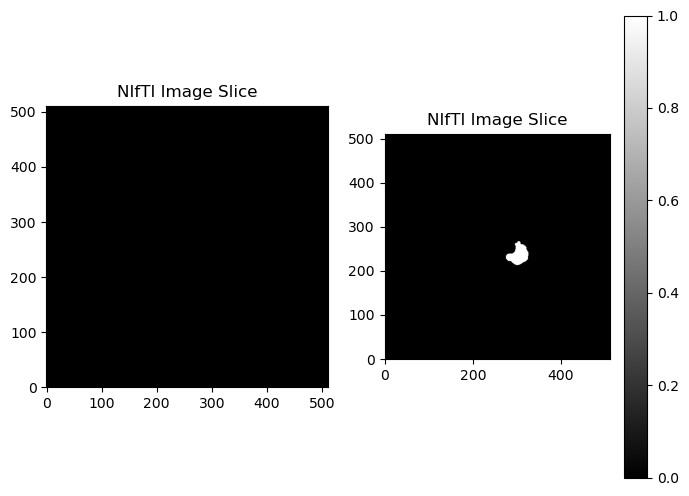

In [39]:


# Load the NIfTI image
nifti_image_path = segmentation_path  # Replace with the path to your NIfTI image
nifti_image = nib.load(nifti_image_path)
image_data = nifti_image.get_fdata()

# Visualize the NIfTI image
plt.figure(figsize=(8, 6))

# Choose a slice to visualize (you can modify the slice index according to your needs)
slice_index = image_data.shape[-1] // 2
plt.subplot(1,2,1)
plt.title("NIfTI Image Slice")
plt.imshow(image_data[:, :, slice_index-20], cmap='gray', origin='lower')
plt.subplot(1,2,2)
plt.imshow(image_data[:, :, slice_index-3], cmap='gray', origin='lower')
plt.title("NIfTI Image Slice")
plt.colorbar()

plt.show()

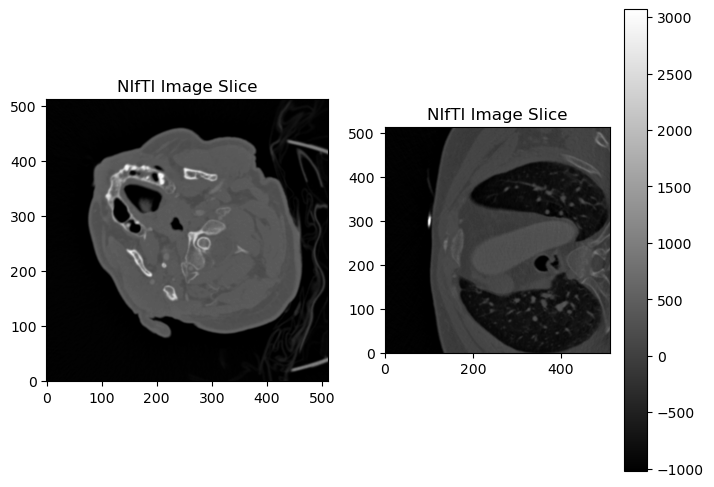

In [36]:


# Load the NIfTI image
nifti_image_path = ct_image_path  # Replace with the path to your NIfTI image
nifti_image = nib.load(nifti_image_path)
image_data = nifti_image.get_fdata()

# Visualize the NIfTI image
plt.figure(figsize=(8, 6))

# Choose a slice to visualize (you can modify the slice index according to your needs)
slice_index = image_data.shape[-1] // 2
plt.subplot(1,2,1)
plt.title("NIfTI Image Slice")
plt.imshow(image_data[:, :, slice_index-20], cmap='gray', origin='lower')
plt.subplot(1,2,2)
plt.imshow(image_data[:, :, slice_index-300], cmap='gray', origin='lower')
plt.title("NIfTI Image Slice")
plt.colorbar()

plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import SimpleITK as sitk
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate


# Define U-Net model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

def unet_model(input_shape, num_classes):
    inputs = Input(input_shape)
    
    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)   

    # Expanding path
    
    up6 = UpSampling2D(size=(2, 2))(conv5)  
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(num_classes, 1, activation='softmax')(conv9)
    
    model = Model(inputs, conv10)
    return model

